In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

import sys
sys.path.insert(0, '/Users/andrewandmatthewfonseca/NWelch/src/')

import TimeSeries
import Bivariate as Bi

In [2]:
# Fonts and Sizes
title_font = 18
label_font = 14
text_font = 12
figsize = (9, 5)

In [3]:
data = pd.read_csv('HD20794_HARPS_Feng17.txt', delim_whitespace=True, comment='#')
data

,RJD,RV,e_RV,BIS,FWHM,Halpha,logR'(HK),NaD1,NaD2,3AP2-1,...,6AP5-4,6AP6-5,9AP2-1,9AP3-2,9AP4-3,9AP5-4,9AP6-5,9AP7-6,9AP8-7,9AP9-8
0,53571.92932,-3.54130,0.38257,-41.67402,6.38962,0.16833,0.96511,0.70038,0.49035,3.39352,...,3.07913,2.13056,-2.25731,1.68105,3.70944,-0.20450,-2.26730,3.35641,0.65005,3.58131
1,53571.93408,-3.76917,0.41364,-41.01080,6.39146,0.16774,0.96602,0.70225,0.49138,1.93219,...,-1.04907,4.48251,0.41171,0.28990,1.32489,1.54338,-1.77583,-1.45835,5.15898,0.83355
2,53571.93854,-4.43531,0.39294,-41.18059,6.39094,0.16735,0.96642,0.70151,0.49181,3.67808,...,1.12875,5.23736,0.97792,2.41222,1.78039,0.96703,0.16103,0.01386,3.54310,5.73817
3,53571.94239,-4.86209,0.38001,-41.47111,6.38986,0.16692,0.96633,0.70080,0.49251,2.91127,...,-1.31392,6.16297,-1.26338,2.31786,0.67180,1.91097,0.44848,-2.04767,3.62819,4.24236
4,53571.94634,-3.12528,0.39686,-41.93214,6.38907,0.16795,0.96531,0.70026,0.49187,3.87870,...,3.14394,1.74174,-1.16608,-0.18713,4.04659,0.47915,-0.73155,2.66149,-0.43096,4.67923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,56538.88169,-3.33677,0.32452,-42.40044,6.40951,0.16493,0.96819,0.70184,0.49811,3.37944,...,-0.35830,5.62643,6.20488,-0.68742,3.68681,0.56467,-3.11838,0.73634,1.88982,4.33900
4879,56564.76211,-3.41550,0.28242,-43.30241,6.41245,0.16540,0.96833,0.70314,0.49066,-0.30794,...,3.41633,0.55355,0.57263,0.43058,-0.01826,-1.58113,1.41791,2.73226,-3.13380,7.01151
4880,56564.76479,-3.97736,0.27438,-42.41135,6.41290,0.16586,0.96900,0.70201,0.48989,0.18912,...,2.42535,-0.96201,2.17649,0.47312,-0.44202,-0.48194,1.35256,1.89994,-3.40059,4.64229
4881,56564.76738,-3.53729,0.29427,-40.30742,6.41489,0.16642,0.96906,0.70254,0.49128,0.87593,...,0.46555,1.34238,3.76880,-1.86315,0.74373,0.07357,1.38032,-0.28740,0.36095,2.30413


In [46]:
# Stellar signals
pb = 18.33 # planet b
pc = 43.17 # planet c (possible)
pld = 88.90 # planet d (pd was conflicting with pandas import)
pe = 147.02 # planet e
pf = 331.41 # planet f (possible)
pg = 11.86 # planet g (possible)
planets = [1/pb, 1/pc, 1/pld, 1/pe, 1/pf, 1/pg]
planet_labels = ['b', 'c', 'd', 'e', 'f', 'g']

In [5]:
# Creating coherence plots between these emissions
logr = TimeSeries.TimeSeries(data['RJD'].to_numpy(), data["logR'(HK)"].to_numpy())
fwhm = TimeSeries.TimeSeries(data['RJD'].to_numpy(), data['FWHM'].to_numpy())
ha = TimeSeries.TimeSeries(data['RJD'].to_numpy(), data['Halpha'].to_numpy())

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033
Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033
Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033


<font size=10><p style="text-align:center"> FWHM vs logR'(HK) </font></p>

In [6]:
fwhm.frequency_grid(0.5, 3)
logr.frequency_grid(0.5, 3)

fwhm.pow_FT(N_bootstrap=1000)
logr.pow_FT(N_bootstrap=1000)

Iteration 0
Iteration 500
Iteration 0
Iteration 500


In [7]:
fwhm.Siegel_test()
logr.Siegel_test()

T statistic: 0.00024
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.03291
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities


In [8]:
fwhm_logr = Bi.Bivariate(data['RJD'].to_numpy(), data["logR'(HK)"].to_numpy(), data['FWHM'].to_numpy())

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033


In [9]:
# We try to find the best boundaries to use for the segmentation.

# Two-segments
two_seg1_fwhm = np.where(fwhm_logr.x_series.t < 2150)[0] # Used 1250 and 1750 before
two_seg2_fwhm = np.where(fwhm_logr.x_series.t > 2150)[0] # Used 1250 and 1750 before

print(two_seg1_fwhm[0], two_seg1_fwhm[-1])
print(two_seg2_fwhm[0], two_seg2_fwhm[-1])

0 2786
2787 4882


In [10]:
# Three-segments
three_seg1_fwhm = np.where(fwhm_logr.x_series.t < 1750)[0]
three_seg2_fwhm = np.where((fwhm_logr.x_series.t > 1750) & (fwhm_logr.x_series.t < 2150))[0]
three_seg3_fwhm = np.where(fwhm_logr.x_series.t > 2150)[0]

print(three_seg1_fwhm[0], three_seg1_fwhm[-1])
print(three_seg2_fwhm[0], three_seg2_fwhm[-1])
print(three_seg3_fwhm[0], three_seg3_fwhm[-1])

0 1484
1485 2786
2787 4882


In [11]:
# Four-segments
four_seg1_fwhm = np.where(fwhm_logr.x_series.t < 1250)[0]
four_seg2_fwhm = np.where((fwhm_logr.x_series.t > 1250) & (fwhm_logr.x_series.t < 2150))[0]
four_seg3_fwhm = np.where((fwhm_logr.x_series.t > 2150) & (fwhm_logr.x_series.t < 2400))[0]
four_seg4_fwhm = np.where(fwhm_logr.x_series.t > 2400)[0]

print(four_seg1_fwhm[0], four_seg1_fwhm[-1])
print(four_seg2_fwhm[0], four_seg2_fwhm[-1])
print(four_seg3_fwhm[0], four_seg3_fwhm[-1])
print(four_seg4_fwhm[0], four_seg4_fwhm[-1])

0 702
703 2786
2787 4162
4163 4882


In [12]:
two_segs_fwhm = np.array([[0, 2786], [2787, 4882]])
three_segs_fwhm = np.array([[0, 1484], [1485, 2786], [2787, 4882]]) #Old Array = np.array([[0,702], [703,2786], [2786,4882]])
four_segs_fwhm = np.array([[0, 702], [703, 2786], [2787, 4162], [4163, 4882]])

Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620
Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620


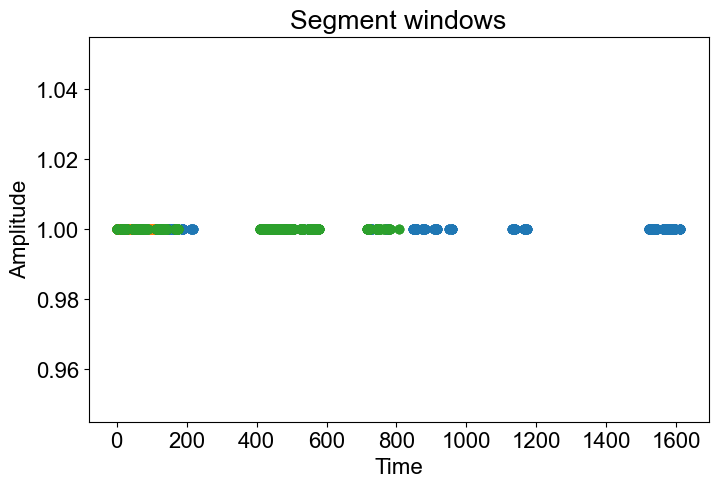

In [13]:
#rv_ha.segment_data(2, 0.2, oversample=6, window='BlackmanHarris', plot_windows=True)


#rv_ha.segment_data(two_segs, 0.2, oversample=6, plot_windows=True)
fwhm_logr.segment_data(three_segs_fwhm, 0.2, oversample=6, plot_windows=True)
#rv_ha.segment_data(four_segs, 0.2, oversample=6, plot_windows=True)

# The window is the taper, the first value is the number of segments.
# Create more instances of segmentation and tapering (2, 3, 4 segments; with and without taper).
# Create manual segment boundaries.
# continue without the taper window

In [14]:
fwhm_logr.Welch_coherence_powspec()
#rv_ha.Welch_coherence_powspec_bootstrap()
# For analytical data, the bootstrap isn't necessary, as it is useful for non-analytical data to estimate the distribution of relevant statistics.

In [15]:
fwhm_logr.Siegel_Welch()

Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


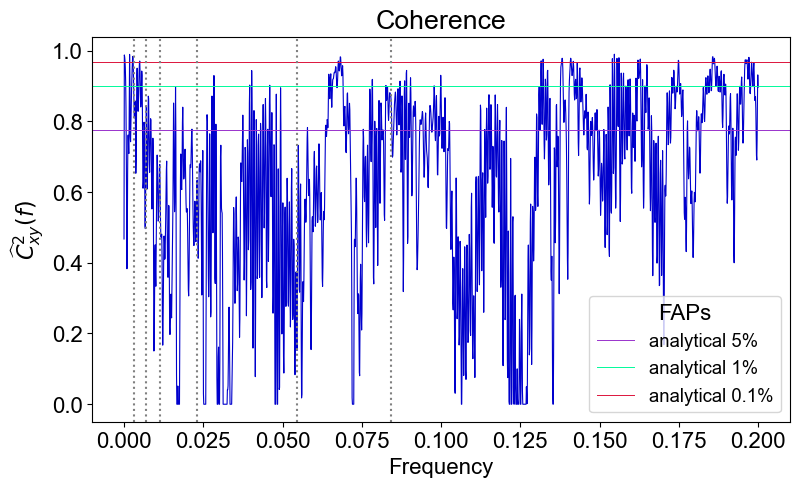

In [16]:
fwhm_logr.coh_plot(show_theoretical_thresholds=True, vlines=planets)

[0.00010352 0.00020704 0.00031056 0.00041408 0.0005176  0.00175983
 0.00186335 0.00248447 0.00258799 0.00269151 0.00279503 0.00289855
 0.00300207 0.00403727 0.00414079 0.00424431 0.0047619  0.00486542
 0.00496894 0.00507246 0.00559006 0.00569358 0.02836439 0.03964803
 0.04026915 0.04596273 0.06459627 0.06469979 0.06511387 0.06521739
 0.06532091 0.06573499 0.06583851 0.06594203 0.06604555 0.06614907
 0.06625259 0.06635611 0.06645963 0.06656315 0.06666667 0.06677019
 0.06687371 0.06697723 0.06708075 0.06728778 0.0673913  0.06749482
 0.06759834 0.06770186 0.06780538 0.0679089  0.06801242 0.06811594
 0.06821946 0.06832298 0.0684265  0.06853002 0.06863354 0.06873706
 0.06884058 0.0689441  0.06904762 0.07826087 0.07836439 0.0826087
 0.08706004 0.08850932 0.08902692 0.08913043 0.09037267 0.09782609
 0.09989648]


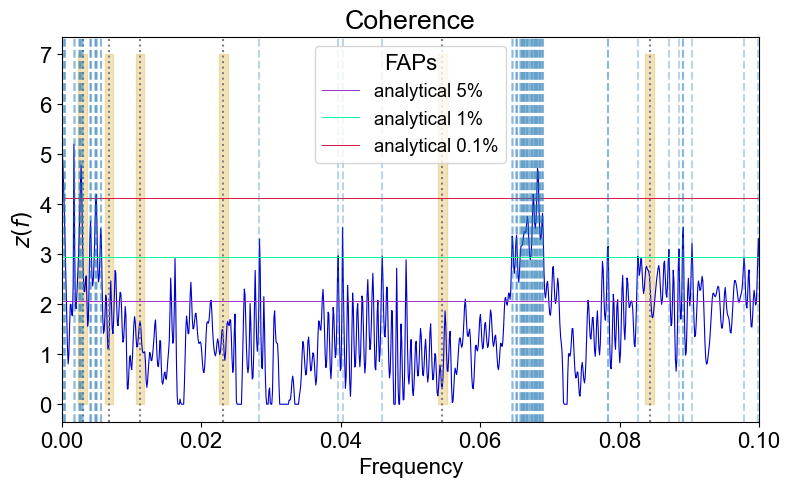

In [49]:
fwhm_logr.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

rayleigh = 0.000620 # Best-case rayleigh resolution limit
for i in planets:
    plt.fill_between([i - rayleigh, i + rayleigh], [0,0], [7, 7], color='goldenrod', alpha=0.3)

plt.xlim(0, 0.1)

# Finding peaks above a FAP threshold of 1%
x = fwhm_logr.pow_coh_grid
y = fwhm_logr.coh_transformed

prob1 = Bi.ztrans(fwhm_logr.coh_prob_1, fwhm_logr.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("fwhm_logr_best_prob1.csv", index=False, header=False)

[0.00010352 0.00020704 0.00031056 0.00041408 0.0005176  0.00175983
 0.00186335 0.00248447 0.00258799 0.00269151 0.00279503 0.00289855
 0.00300207 0.00403727 0.00414079 0.00424431 0.0047619  0.00486542
 0.00496894 0.00507246 0.00559006 0.00569358 0.02836439 0.03964803
 0.04026915 0.04596273 0.06459627 0.06469979 0.06511387 0.06521739
 0.06532091 0.06573499 0.06583851 0.06594203 0.06604555 0.06614907
 0.06625259 0.06635611 0.06645963 0.06656315 0.06666667 0.06677019
 0.06687371 0.06697723 0.06708075 0.06728778 0.0673913  0.06749482
 0.06759834 0.06770186 0.06780538 0.0679089  0.06801242 0.06811594
 0.06821946 0.06832298 0.0684265  0.06853002 0.06863354 0.06873706
 0.06884058 0.0689441  0.06904762 0.07826087 0.07836439 0.0826087
 0.08706004 0.08850932 0.08902692 0.08913043 0.09037267 0.09782609
 0.09989648]


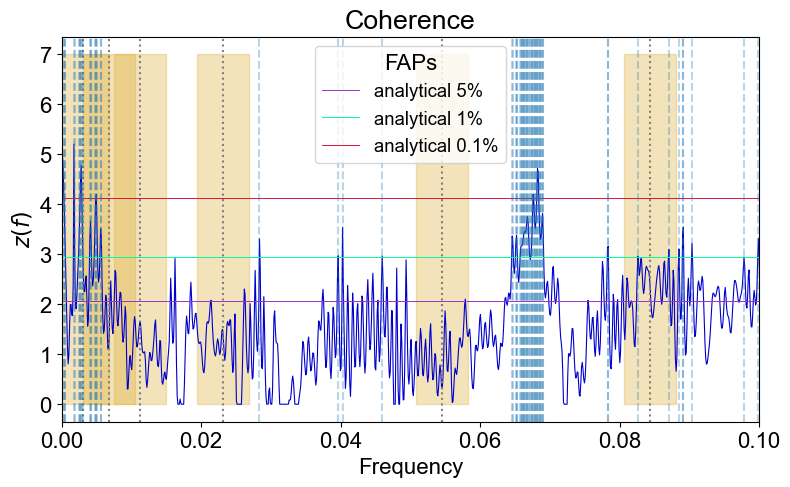

In [50]:
fwhm_logr.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

rayleigh = 0.003729
for i in planets:
    plt.fill_between([i - rayleigh, i + rayleigh], [0,0], [7, 7], color='goldenrod', alpha=0.3)

plt.xlim(0, 0.1)

# Finding peaks above a FAP threshold of 1%
x = fwhm_logr.pow_coh_grid
y = fwhm_logr.coh_transformed

prob1 = Bi.ztrans(fwhm_logr.coh_prob_1, fwhm_logr.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("fwhm_logr_realistic_prob1.csv", index=False, header=False)

<font size=10><p style="text-align:center"> FWHM vs H$\alpha$ </font></p>

In [19]:
fwhm.frequency_grid(0.5, 3)
ha.frequency_grid(0.5, 3)

fwhm.pow_FT(N_bootstrap=1000)
ha.pow_FT(N_bootstrap=1000)

Iteration 0
Iteration 500
Iteration 0
Iteration 500


In [20]:
fwhm.Siegel_test()
ha.Siegel_test()

T statistic: 0.00024
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.00313
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities


In [21]:
fwhm_ha = Bi.Bivariate(data['RJD'].to_numpy(), data['Halpha'].to_numpy(), data['FWHM'].to_numpy())

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033


In [22]:
# We try to find the best boundaries to use for the segmentation.

# Two-segments
two_seg1_fwhm = np.where(fwhm_ha.x_series.t < 2150)[0] # Used 1250 and 1750 before
two_seg2_fwhm = np.where(fwhm_ha.x_series.t > 2150)[0] # Used 1250 and 1750 before

print(two_seg1_fwhm[0], two_seg1_fwhm[-1])
print(two_seg2_fwhm[0], two_seg2_fwhm[-1])

0 2786
2787 4882


In [23]:
# Three-segments
three_seg1_fwhm = np.where(fwhm_ha.x_series.t < 1750)[0]
three_seg2_fwhm = np.where((fwhm_ha.x_series.t > 1750) & (fwhm_ha.x_series.t < 2150))[0]
three_seg3_fwhm = np.where(fwhm_ha.x_series.t > 2150)[0]

print(three_seg1_fwhm[0], three_seg1_fwhm[-1])
print(three_seg2_fwhm[0], three_seg2_fwhm[-1])
print(three_seg3_fwhm[0], three_seg3_fwhm[-1])

0 1484
1485 2786
2787 4882


In [24]:
# Four-segments
four_seg1_fwhm = np.where(fwhm_ha.x_series.t < 1250)[0]
four_seg2_fwhm = np.where((fwhm_ha.x_series.t > 1250) & (fwhm_ha.x_series.t < 2150))[0]
four_seg3_fwhm = np.where((fwhm_ha.x_series.t > 2150) & (fwhm_ha.x_series.t < 2400))[0]
four_seg4_fwhm = np.where(fwhm_ha.x_series.t > 2400)[0]

print(four_seg1_fwhm[0], four_seg1_fwhm[-1])
print(four_seg2_fwhm[0], four_seg2_fwhm[-1])
print(four_seg3_fwhm[0], four_seg3_fwhm[-1])
print(four_seg4_fwhm[0], four_seg4_fwhm[-1])

0 702
703 2786
2787 4162
4163 4882


In [25]:
two_segs_fwhm = np.array([[0, 2786], [2787, 4882]])
three_segs_fwhm = np.array([[0, 1484], [1485, 2786], [2787, 4882]]) #Old Array = np.array([[0,702], [703,2786], [2786,4882]])
four_segs_fwhm = np.array([[0, 702], [703, 2786], [2787, 4162], [4163, 4882]])

Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620
Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620


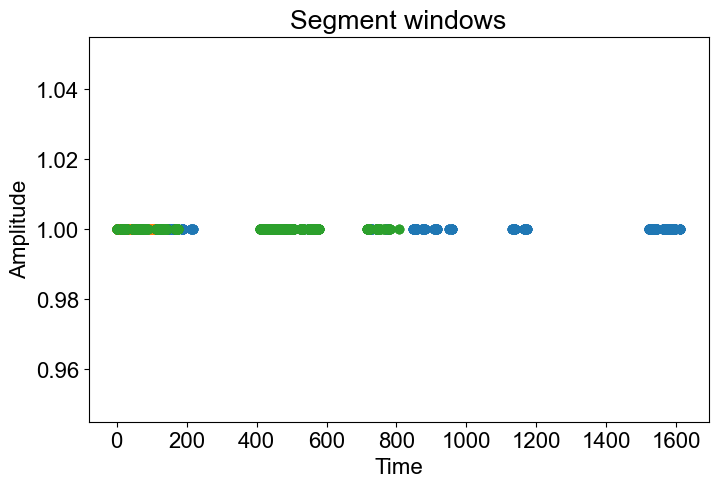

In [26]:
#rv_ha.segment_data(2, 0.2, oversample=6, window='BlackmanHarris', plot_windows=True)


#rv_ha.segment_data(two_segs, 0.2, oversample=6, plot_windows=True)
fwhm_ha.segment_data(three_segs_fwhm, 0.2, oversample=6, plot_windows=True)
#rv_ha.segment_data(four_segs, 0.2, oversample=6, plot_windows=True)

# The window is the taper, the first value is the number of segments.
# Create more instances of segmentation and tapering (2, 3, 4 segments; with and without taper).
# Create manual segment boundaries.
# continue without the taper window

In [27]:
fwhm_ha.Welch_coherence_powspec()
#rv_ha.Welch_coherence_powspec_bootstrap()
# For analytical data, the bootstrap isn't necessary, as it is useful for non-analytical data to estimate the distribution of relevant statistics.

In [28]:
fwhm_ha.Siegel_Welch()

Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


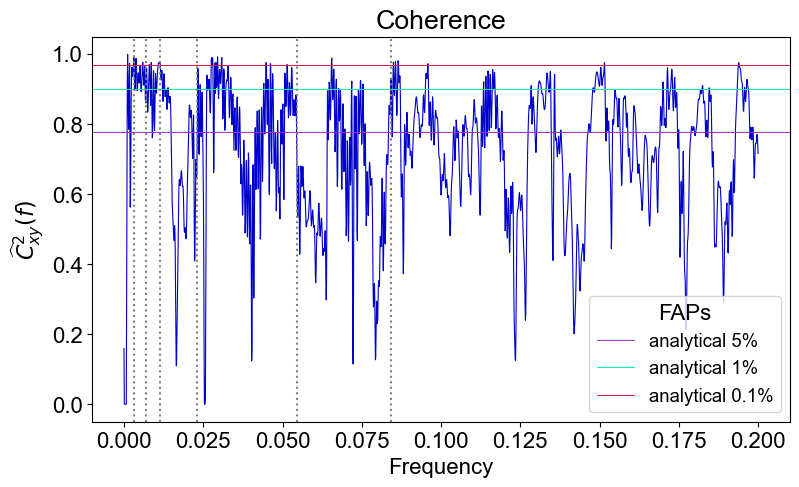

In [29]:
fwhm_ha.coh_plot(show_theoretical_thresholds=True, vlines=planets)

[0.0010352  0.00113872 0.00124224 0.00165631 0.00175983 0.00238095
 0.00248447 0.00258799 0.00269151 0.00279503 0.00289855 0.00300207
 0.00310559 0.00320911 0.00331263 0.00351967 0.00362319 0.00372671
 0.00383023 0.00393375 0.00403727 0.00424431 0.00434783 0.00445135
 0.00455487 0.00465839 0.0047619  0.00486542 0.00496894 0.00507246
 0.00517598 0.0052795  0.00559006 0.00569358 0.0057971  0.00590062
 0.00600414 0.00610766 0.00621118 0.0063147  0.00641822 0.00652174
 0.00662526 0.00703934 0.00714286 0.00724638 0.00776398 0.00786749
 0.00797101 0.00807453 0.00817805 0.00848861 0.00859213 0.00869565
 0.00921325 0.00931677 0.00993789 0.01004141 0.01035197 0.01045549
 0.01055901 0.01066253 0.01076605 0.01086957 0.01097308 0.0110766
 0.01118012 0.01128364 0.01138716 0.01149068 0.0115942  0.01169772
 0.01180124 0.01190476 0.01200828 0.0121118  0.01252588 0.0126294
 0.01273292 0.01387164 0.02329193 0.02339545 0.02401656 0.02608696
 0.02619048 0.026294   0.02660455 0.02670807 0.02681159 0.026915

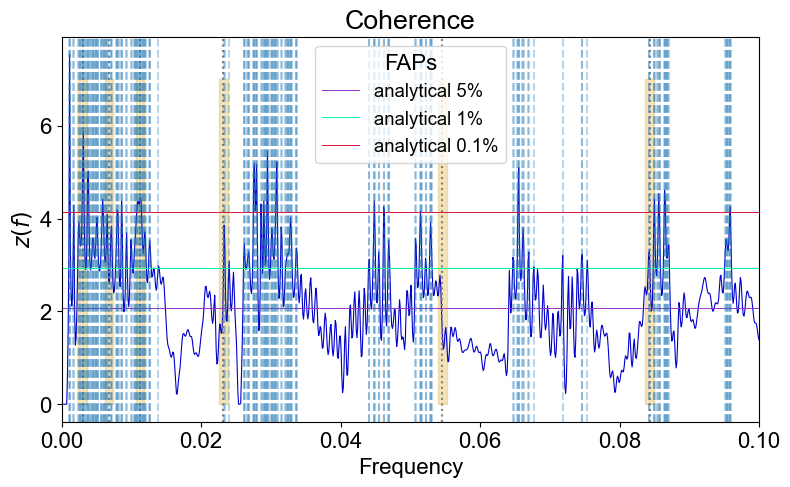

In [51]:
fwhm_ha.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

rayleigh = 0.000620 # Best-case rayleigh resolution limit
for i in planets:
    plt.fill_between([i - rayleigh, i + rayleigh], [0,0], [7, 7], color='goldenrod', alpha=0.3)

plt.xlim(0, 0.1)

# Finding peaks above a FAP threshold of 1%
x = fwhm_ha.pow_coh_grid
y = fwhm_ha.coh_transformed

prob1 = Bi.ztrans(fwhm_ha.coh_prob_1, fwhm_ha.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("fwhm_ha_best_prob1.csv", index=False, header=False)

[0.0010352  0.00113872 0.00124224 0.00165631 0.00175983 0.00238095
 0.00248447 0.00258799 0.00269151 0.00279503 0.00289855 0.00300207
 0.00310559 0.00320911 0.00331263 0.00351967 0.00362319 0.00372671
 0.00383023 0.00393375 0.00403727 0.00424431 0.00434783 0.00445135
 0.00455487 0.00465839 0.0047619  0.00486542 0.00496894 0.00507246
 0.00517598 0.0052795  0.00559006 0.00569358 0.0057971  0.00590062
 0.00600414 0.00610766 0.00621118 0.0063147  0.00641822 0.00652174
 0.00662526 0.00703934 0.00714286 0.00724638 0.00776398 0.00786749
 0.00797101 0.00807453 0.00817805 0.00848861 0.00859213 0.00869565
 0.00921325 0.00931677 0.00993789 0.01004141 0.01035197 0.01045549
 0.01055901 0.01066253 0.01076605 0.01086957 0.01097308 0.0110766
 0.01118012 0.01128364 0.01138716 0.01149068 0.0115942  0.01169772
 0.01180124 0.01190476 0.01200828 0.0121118  0.01252588 0.0126294
 0.01273292 0.01387164 0.02329193 0.02339545 0.02401656 0.02608696
 0.02619048 0.026294   0.02660455 0.02670807 0.02681159 0.026915

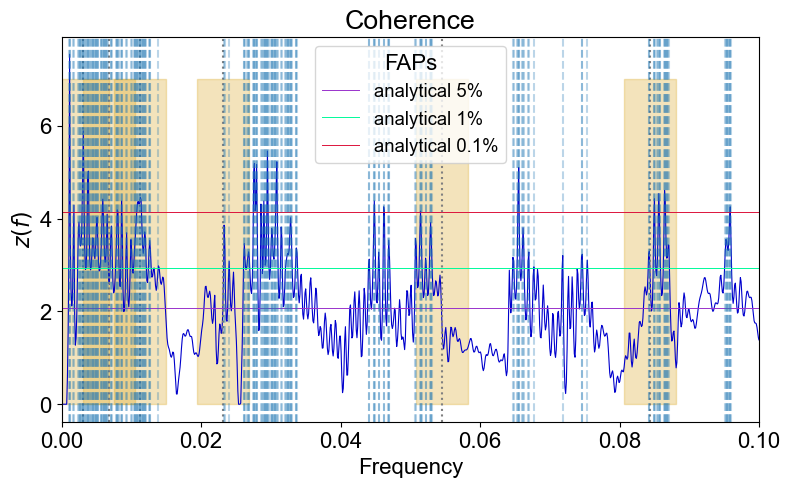

In [52]:
fwhm_ha.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

rayleigh = 0.003729
for i in planets:
    plt.fill_between([i - rayleigh, i + rayleigh], [0,0], [7, 7], color='goldenrod', alpha=0.3)

plt.xlim(0, 0.1)

# Finding peaks above a FAP threshold of 1%
x = fwhm_ha.pow_coh_grid
y = fwhm_ha.coh_transformed

prob1 = Bi.ztrans(fwhm_ha.coh_prob_1, fwhm_ha.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("fwhm_ha_realistic_prob1.csv", index=False, header=False)

<font size=10><p style="text-align:center"> logR'(HK) vs H$\alpha$ </font></p>

In [32]:
logr.frequency_grid(0.5, 3)
ha.frequency_grid(0.5, 3)

logr.pow_FT(N_bootstrap=1000)
ha.pow_FT(N_bootstrap=1000)

Iteration 0
Iteration 500
Iteration 0
Iteration 500


In [33]:
logr.Siegel_test()
ha.Siegel_test()

T statistic: 0.03291
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.00313
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities


In [34]:
logr_ha = Bi.Bivariate(data['RJD'].to_numpy(), data['Halpha'].to_numpy(), data["logR'(HK)"].to_numpy())

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033


In [35]:
# We try to find the best boundaries to use for the segmentation.

# Two-segments
two_seg1_fwhm = np.where(logr_ha.x_series.t < 2150)[0] # Used 1250 and 1750 before
two_seg2_fwhm = np.where(logr_ha.x_series.t > 2150)[0] # Used 1250 and 1750 before

print(two_seg1_fwhm[0], two_seg1_fwhm[-1])
print(two_seg2_fwhm[0], two_seg2_fwhm[-1])

0 2786
2787 4882


In [36]:
# Three-segments
three_seg1_fwhm = np.where(logr_ha.x_series.t < 1750)[0]
three_seg2_fwhm = np.where((logr_ha.x_series.t > 1750) & (logr_ha.x_series.t < 2150))[0]
three_seg3_fwhm = np.where(logr_ha.x_series.t > 2150)[0]

print(three_seg1_fwhm[0], three_seg1_fwhm[-1])
print(three_seg2_fwhm[0], three_seg2_fwhm[-1])
print(three_seg3_fwhm[0], three_seg3_fwhm[-1])

0 1484
1485 2786
2787 4882


In [37]:
# Four-segments
four_seg1_fwhm = np.where(logr_ha.x_series.t < 1250)[0]
four_seg2_fwhm = np.where((logr_ha.x_series.t > 1250) & (logr_ha.x_series.t < 2150))[0]
four_seg3_fwhm = np.where((logr_ha.x_series.t > 2150) & (logr_ha.x_series.t < 2400))[0]
four_seg4_fwhm = np.where(logr_ha.x_series.t > 2400)[0]

print(four_seg1_fwhm[0], four_seg1_fwhm[-1])
print(four_seg2_fwhm[0], four_seg2_fwhm[-1])
print(four_seg3_fwhm[0], four_seg3_fwhm[-1])
print(four_seg4_fwhm[0], four_seg4_fwhm[-1])

0 702
703 2786
2787 4162
4163 4882


In [38]:
two_segs_fwhm = np.array([[0, 2786], [2787, 4882]])
three_segs_fwhm = np.array([[0, 1484], [1485, 2786], [2787, 4882]]) #Old Array = np.array([[0,702], [703,2786], [2786,4882]])
four_segs_fwhm = np.array([[0, 702], [703, 2786], [2787, 4162], [4163, 4882]])

Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620
Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620


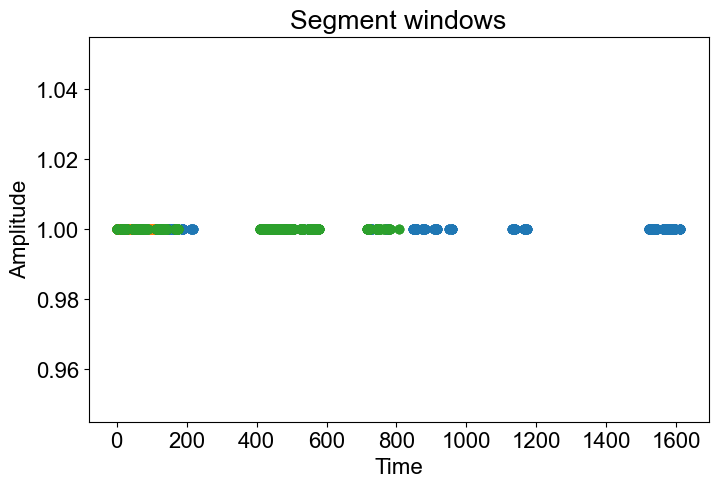

In [39]:
#rv_ha.segment_data(2, 0.2, oversample=6, window='BlackmanHarris', plot_windows=True)


#rv_ha.segment_data(two_segs, 0.2, oversample=6, plot_windows=True)
logr_ha.segment_data(three_segs_fwhm, 0.2, oversample=6, plot_windows=True)
#rv_ha.segment_data(four_segs, 0.2, oversample=6, plot_windows=True)

# The window is the taper, the first value is the number of segments.
# Create more instances of segmentation and tapering (2, 3, 4 segments; with and without taper).
# Create manual segment boundaries.
# continue without the taper window

In [40]:
logr_ha.Welch_coherence_powspec()
#rv_ha.Welch_coherence_powspec_bootstrap()
# For analytical data, the bootstrap isn't necessary, as it is useful for non-analytical data to estimate the distribution of relevant statistics.

In [41]:
logr_ha.Siegel_Welch()

Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


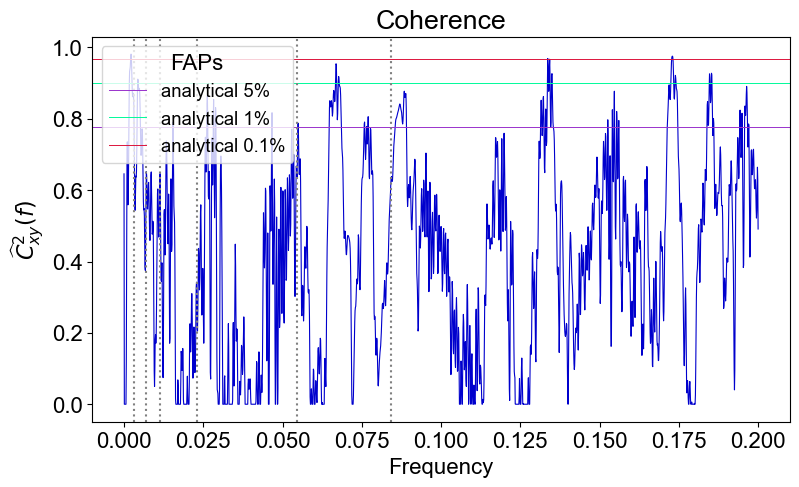

In [42]:
logr_ha.coh_plot(show_theoretical_thresholds=True, vlines=planets)

[0.00175983 0.00186335 0.00196687 0.00207039 0.00217391 0.00227743
 0.00238095 0.00248447 0.00434783 0.00445135 0.06677019 0.06687371
 0.06697723 0.06759834 0.06770186 0.06780538]


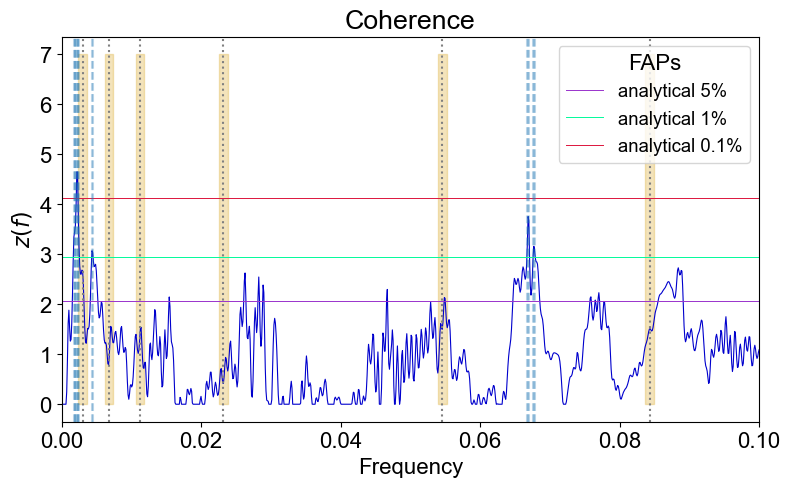

In [53]:
logr_ha.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

rayleigh = 0.000620 # Best-case rayleigh resolution limit
for i in planets:
    plt.fill_between([i - rayleigh, i + rayleigh], [0,0], [7, 7], color='goldenrod', alpha=0.3)
    
plt.xlim(0, 0.1)

# Finding peaks above a FAP threshold of 1%
x = logr_ha.pow_coh_grid
y = logr_ha.coh_transformed

prob1 = Bi.ztrans(logr_ha.coh_prob_1, logr_ha.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("logr_ha_best_prob1.csv", index=False, header=False)
# Note that pd is initially defined for the panda import, then is used as a variable for planet d signal. It would not work for panda import if used in sequence

[0.00175983 0.00186335 0.00196687 0.00207039 0.00217391 0.00227743
 0.00238095 0.00248447 0.00434783 0.00445135 0.06677019 0.06687371
 0.06697723 0.06759834 0.06770186 0.06780538]


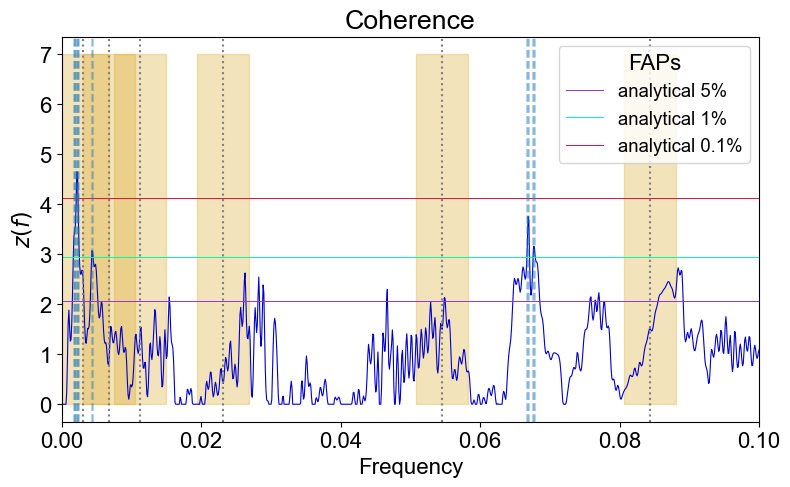

In [87]:
logr_ha.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

rayleigh = 0.003729
for i in planets:
    plt.fill_between([i - rayleigh, i + rayleigh], [0,0], [7, 7], color='goldenrod', alpha=0.3)

plt.xlim(0, 0.1)

# Finding peaks above a FAP threshold of 1%
x = logr_ha.pow_coh_grid
y = logr_ha.coh_transformed

prob1 = Bi.ztrans(logr_ha.coh_prob_1, logr_ha.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("logr_ha_best_prob1.csv", index=False, header=False)
# Note that pd is initially defined for the panda import, then is used as a variable for planet d signal. It would not work for panda import if used in sequence

In [79]:
# Creating transformed coherences for the bivariate objects that are from the other notebooks (everything is suppressed)
rv_logr = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data["logR'(HK)"].to_numpy())
rv_ha = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data['Halpha'].to_numpy())
rv_fwhm = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data['FWHM'].to_numpy())

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033
Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033
Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033


In [80]:
# Three-segments
three_seg1_logr = np.where(rv_logr.x_series.t < 1750)[0]
three_seg2_logr = np.where((rv_logr.x_series.t > 1750) & (rv_logr.x_series.t < 2150))[0]
three_seg3_logr = np.where(rv_logr.x_series.t > 2150)[0]

print(three_seg1_logr[0], three_seg1_logr[-1])
print(three_seg2_logr[0], three_seg2_logr[-1])
print(three_seg3_logr[0], three_seg3_logr[-1])

three_segs_logr = np.array([[0, 1484], [1485, 2786], [2787, 4882]])

0 1484
1485 2786
2787 4882


Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620
Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000620
Number of segments: 3
Segment start and end points: [[   0 1484]
 [1485 2786]
 [2787 4882]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000104
Minimum 6-dB main lobe half width: 0.000750
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003729
Best achievable Rayleigh limit (1/2 

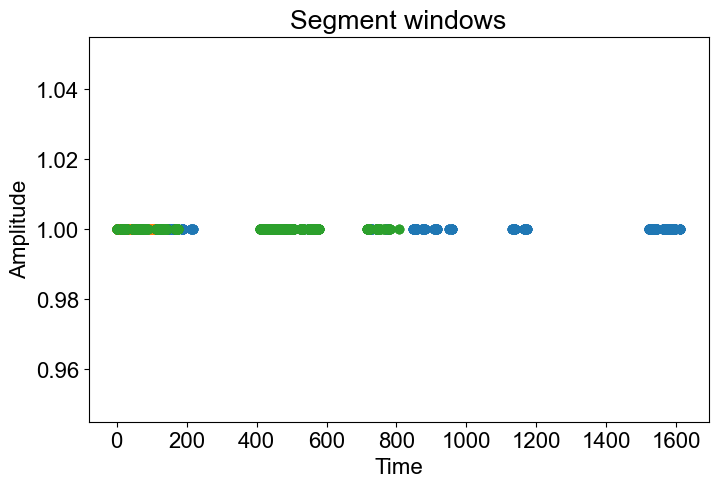

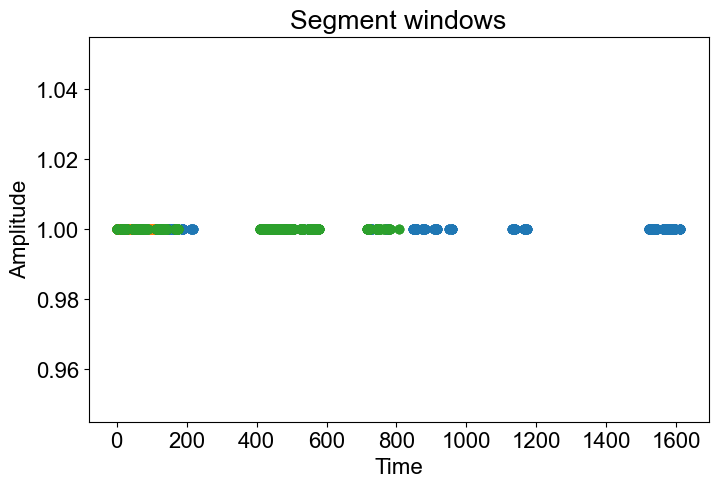

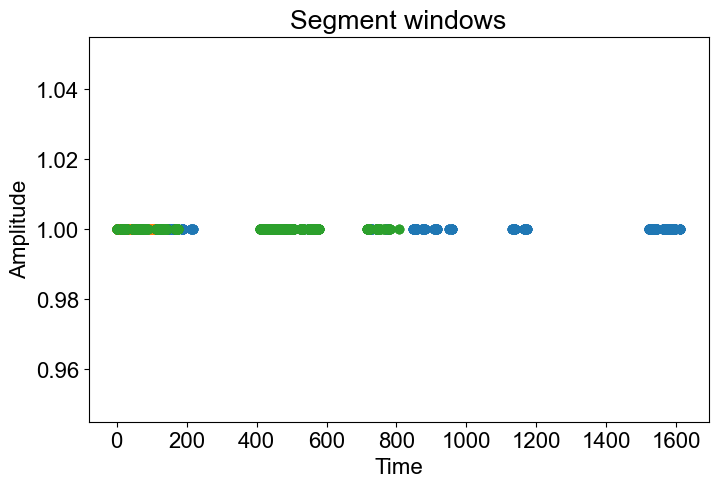

In [81]:
rv_logr.segment_data(three_segs_logr, 0.2, oversample=6, plot_windows=True)
rv_ha.segment_data(three_segs_logr, 0.2, oversample=6, plot_windows=True)
rv_fwhm.segment_data(three_segs_logr, 0.2, oversample=6, plot_windows=True)

In [82]:
rv_logr.Welch_coherence_powspec()
rv_ha.Welch_coherence_powspec()
rv_fwhm.Welch_coherence_powspec()

In [83]:
rv_logr.Siegel_Welch()
rv_ha.Siegel_Welch()
rv_fwhm.Siegel_Welch()

Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00433
Null hypothesis not rejected: This time series could be white noise (or

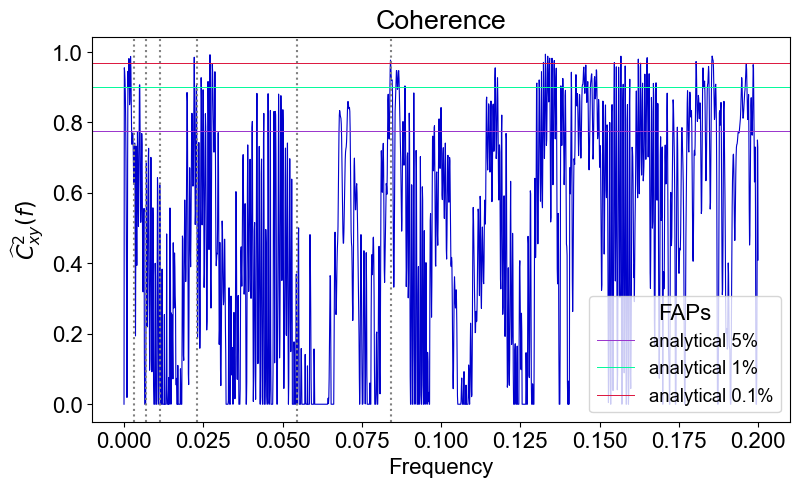

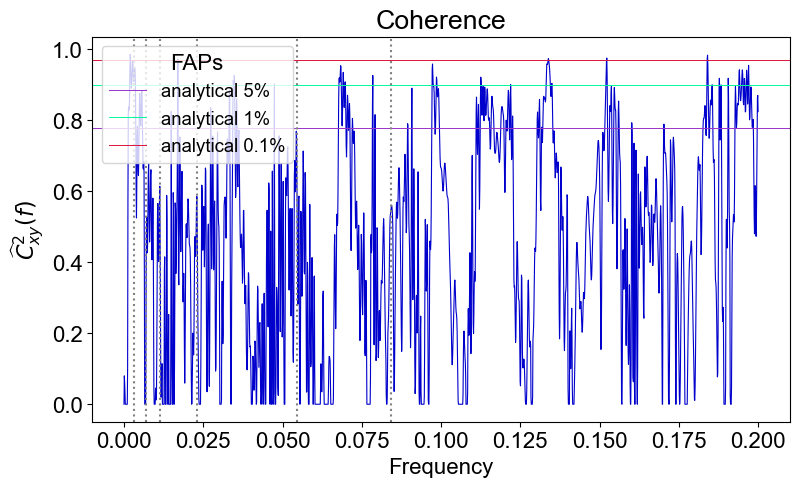

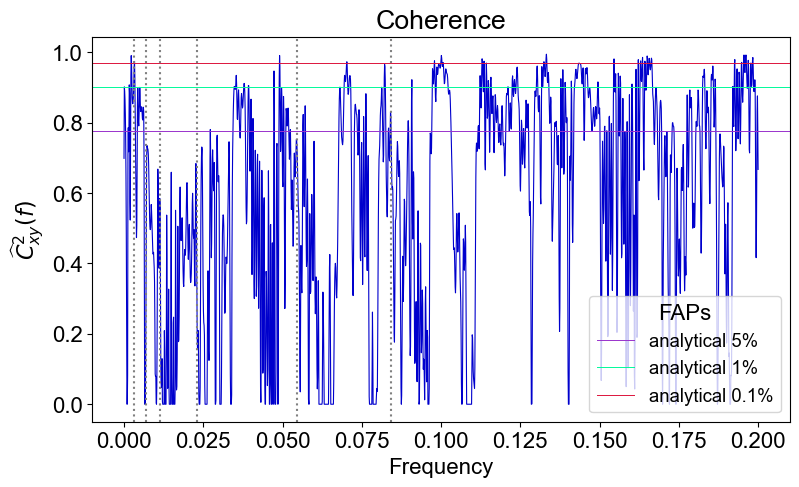

In [84]:
rv_logr.coh_plot(show_theoretical_thresholds=True, vlines=planets)
rv_ha.coh_plot(show_theoretical_thresholds=True, vlines=planets)
rv_fwhm.coh_plot(show_theoretical_thresholds=True, vlines=planets)

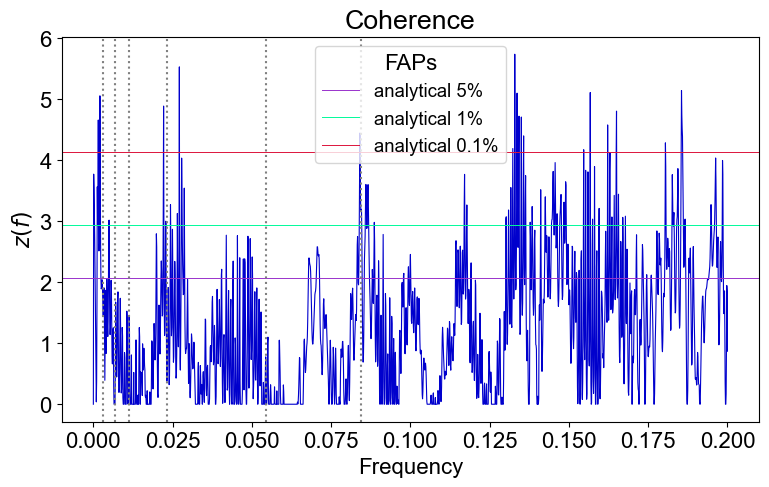

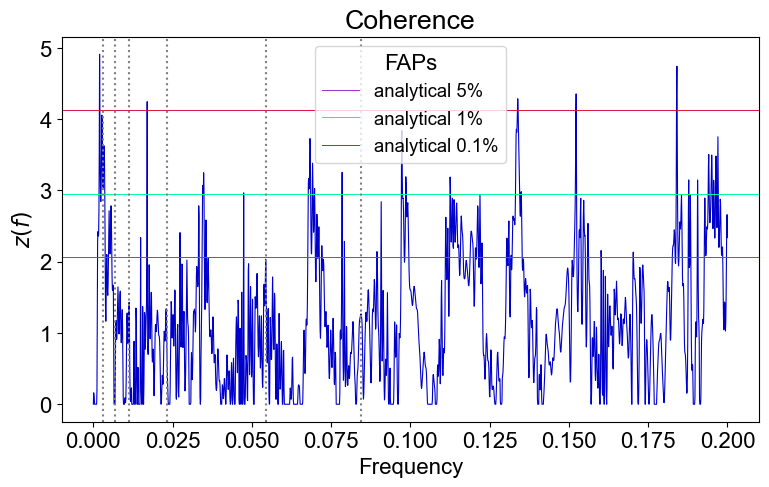

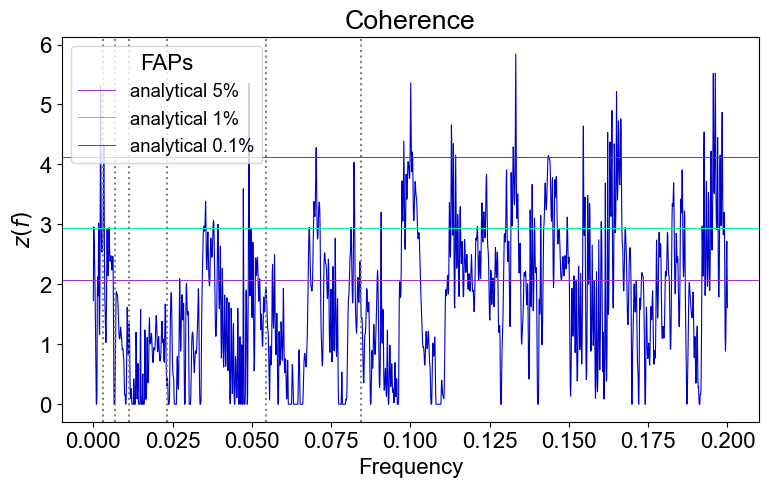

In [85]:
test = rv_logr.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)
rv_ha.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)
rv_fwhm.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)

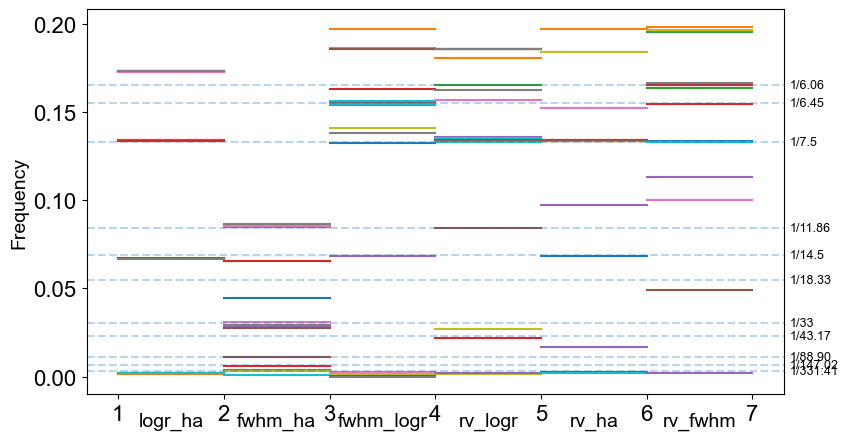

In [173]:
# Creating coherence line plot
plt.figure(figsize=figsize)
plt.ylabel('Frequency', fontsize=label_font)

coh_array = [logr_ha, fwhm_ha, fwhm_logr, rv_logr, rv_ha, rv_fwhm] # coherence bivariate objects
# Create more arrays for different segmentation, i.e. coh_array_2segs = [...], coh_array_4segs = [...]
start = [1, 2, 3, 4, 5, 6] # start of coherence sections
end = [2, 3, 4, 5, 6, 7] # end of coherence sections
x_range = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5] # x label positioning
x_labels = ['logr_ha', 'fwhm_ha', 'fwhm_logr', 'rv_logr', 'rv_ha', 'rv_fwhm']
freq = [0.069, 0.133, 0.155, 0.165, 1/33, 1/pg, 1/pb, 1/pc, 1/pld, 1/pe, 1/pf]
y_labels = ['1/14.5', '1/7.5', '1/6.45', '1/6.06', '1/33', '1/11.86', '1/18.33', '1/43.17', '1/88.90', '1/147.02', '1/331.41']

def coherence_line_plot(bivar_obj, start, end):
    coherence_ordered = np.argsort(bivar_obj.coh_transformed)
    highest_coherence_peaks = coherence_ordered[-20:] # top 20 coherence peaks
    frequencies_highest_coherence = bivar_obj.pow_coh_grid[highest_coherence_peaks]
    for i in range(0, 20):
        plt.plot([start, end], [frequencies_highest_coherence[i], frequencies_highest_coherence[i]])

# Plotting coherence line sections 
for coh, i, j in zip(coh_array, start, end):
    coherence_line_plot(coh,i,j)

# Labeling the x-axis for the individual ranges of the coherences
for s, x in zip(x_range, x_labels):
    plt.text(s, -0.025, x, fontsize=label_font, ha='center', va='center')

# Creating horizontal lines at noteable frequencies
for f in freq:
    plt.axhline(y=f, linestyle='--', alpha=0.3)

# Labeling the y-axis for horizontal signal lines
for f, y in zip(freq, y_labels):
    plt.text(7.35, f, y, fontsize=label_font-5, ha='left', va='center')
    
# label x axis for each pair comparison. Test range of 20 highest coherence values.
# Top 20 peaks that are above the 5% threshold level.
# import coherence plotted bivariate object from other notebooks as its own variable.
# put line near purple line at around 1/39.
# Create logic to change frequncies for line plot based on segmentation; some logic is made at the top of this cell
#^

In [175]:
rv_logr.Welch_coherence_powspec()
rv_logr.Siegel_Welch(tri=True)

Siegel's test on Sxx:
T statistic: 0.00720
T threshold for rejecting white noise hypothesis at 5% level: 0.01969
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00277
T threshold for rejecting white noise hypothesis at 5% level: 0.01969
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


In [176]:
rv_ha.Welch_coherence_powspec()
rv_ha.Siegel_Welch(tri=True)

Siegel's test on Sxx:
T statistic: 0.00720
T threshold for rejecting white noise hypothesis at 5% level: 0.01969
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.01969
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


In [177]:
rv_fwhm.Welch_coherence_powspec()
rv_fwhm.Siegel_Welch(tri=True)

Siegel's test on Sxx:
T statistic: 0.00720
T threshold for rejecting white noise hypothesis at 5% level: 0.01969
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.01969
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


 - Collect evidence that the 331-day signal is due to Earth's one-year orbit: use stripe plot and spectral window
 
The stripe plot and spectral window points towards the 331-day signal being due to Earth's orbit. Other signals within the plot also shows the possibility of Earth-Moon-Sun interference.
 
 - Edit stripe plot as per discussion
 
Simplified code to create stripe plot. Made it easier to create the logic to make a stripe plot for different segmentation. I would just need to create an array with the different segmentation objects. For example, coh_array_2segs = [...], etc.
 
 - Investigate the ~1/39-day signal: could it match the purple stripe in fwhm_ha in the stripe plot? Does it show up in any periodogram?
 
A ~1/39 day signal does not match the purple strip in fwhm_ha in the stripe plot. The purple stripe lines up more with a 1/33 day signal, as shown in the stripe plot now. 

The 1/33 day signal has some presence in the periodograms from the other coherence notebooks. I added the signal to the planets array to see where it may be. It is the 4th line from the right (and left, i guess).

 - Think about 7.5-day signal: what is it? Related to moon?
 
This 7.5 signal may be coming from the moon, where it may be the 4th harmonic. It could possibly instrument aliasing, since HARPS is a ground-based instrument. It could have aliased from samplied artifacts from weekly observations.

It could also be from phase interference from the sun due to its Carrington rotation period (i.e. the time it takes the sun to do a full rotation in view). The Earth's daily rotation could also cause sampling bias. Could be overlapping signals. The rotation period of the Sun and Moon are quite similar (~27 days and 29.5 days respectively to complete one rotation.)

 - Run Siegel's test for all periodograms / Welch's power spectra. See if it detects periodicity. Try both tri=False and tri=True, Welch=False and Welch=True.
 
These Siegel's test can be found in the other notebooks, along with the periodograms that contain the 1/33 signal.

 - Start Overleaf

Make a table of the peaks within the 18 plots that were put into the google slide. Read multiple articles to get more information on the characteristics of this star and its systems, along with its planets, i.e. rotation period, signals, 

Meeting With Victor:

 - Helped find the peaks within the coherence plots so I can write down their frequencies and compare them with each other.
 - Helped define the focus of the research; focus on validating the signals in the literature and finding other characteristics of this star. For the newest 2025 paper, he said it would be good to used the data from HARPS and ESPRESSO sepreately, and then combine them to see how they compare. Would they line up as good data?
 - In the notebook where we compare the activity indicators to one another, i.e. the current notebook, the peaks within these coherence that are at a planet signal would indicate that the planet may not be present. Look at the peak at ~600 day, in reference to the 2025 paper, where they claim to find evidence that this signal is a planet signal.
 - Could make a tolerance for the vertical lines when finding peaks to not having so many similar vertical lines on the coherence plots.

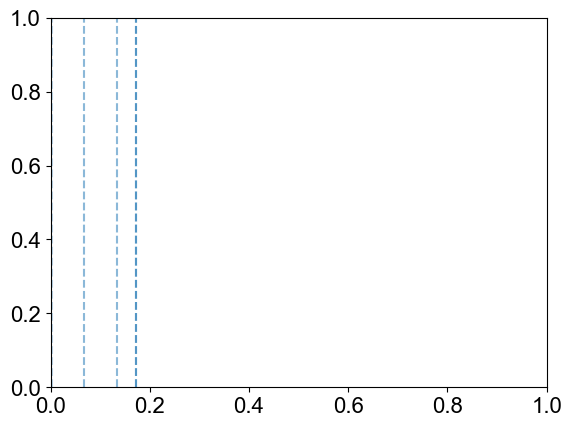

In [45]:
# Attempting to use numpy.argmax to find peaks for coherence plots (deprecated)
threshold = 4
mask = y > threshold
masked_y = np.where(mask, y, -np.inf)
peak_index = np.argmax(masked_y)
max_peaks = x[np.argsort(masked_y)][-10: -1]
for i in max_peaks:
    plt.axvline(i, alpha=0.3, ls='--')
    
# Previous attempt at getting the peaks of coherences (deprecated)
    
# Finding peaks above a FAP threshold of 1%
x = logr_ha.pow_coh_grid
y = logr_ha.coh_transformed

prob1 = Bi.ztrans(logr_ha.coh_prob_1, logr_ha.Nseg_eff) # Change the coh_prob_x depending on FAP probability threshold
peak1 = x[y > prob1]
filtered_peaks1 = peak1[peak1 <= 0.1]


for i in filtered_peaks1:
    plt.axvline(i, alpha=0.3, ls='--')

np.set_printoptions(suppress=True)
print(filtered_peaks1)

# To save array with peaks into a file
df = pd.DataFrame(filtered_peaks1)
df.to_csv("logr_ha_realistic_prob1.csv", index=False, header=False)

In [ ]:
rv_logr = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data["logR'(HK)"].to_numpy())
rv_ha = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data['Halpha'].to_numpy())
rv_fwhm = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data['FWHM'].to_numpy())

In [ ]:
# Three-segments
three_seg1_logr = np.where(rv_logr.x_series.t < 1750)[0]
three_seg2_logr = np.where((rv_logr.x_series.t > 1750) & (rv_logr.x_series.t < 2150))[0]
three_seg3_logr = np.where(rv_logr.x_series.t > 2150)[0]

print(three_seg1_logr[0], three_seg1_logr[-1])
print(three_seg2_logr[0], three_seg2_logr[-1])
print(three_seg3_logr[0], three_seg3_logr[-1])

three_segs_logr = np.array([[0, 1484], [1485, 2786], [2787, 4882]])

In [ ]:
rv_logr.segment_data(three_segs_logr, 0.2, oversample=6, plot_windows=True)
rv_ha.segment_data(three_segs_logr, 0.2, oversample=6, plot_windows=True)
rv_fwhm.segment_data(three_segs_logr, 0.2, oversample=6, plot_windows=True)

In [ ]:
rv_logr.Siegel_Welch()
rv_ha.Siegel_Welch()
rv_fwhm.Siegel_Welch()

In [ ]:
rv_logr.coh_plot(show_theoretical_thresholds=True, vlines=planets)
rv_ha.coh_plot(show_theoretical_thresholds=True, vlines=planets)
rv_fwhm.coh_plot(show_theoretical_thresholds=True, vlines=planets)

In [ ]:
rv_logr.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)
rv_ha.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)
rv_fwhm.coh_plot(transformed=True, vlines=planets, show_theoretical_thresholds=True, show_boot_thresholds=False)